In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore")


In [2]:
train=pd.read_csv('https://raw.githubusercontent.com/powell-menezes/Indian-Metro-Traffic-Volume-Prediction/master/Train.csv')
test=pd.read_csv('https://raw.githubusercontent.com/powell-menezes/Indian-Metro-Traffic-Volume-Prediction/master/Test.csv')

In [3]:
train.isnull().any()

date_time              False
is_holiday             False
air_pollution_index    False
humidity               False
wind_speed             False
wind_direction         False
visibility_in_miles    False
dew_point              False
temperature            False
rain_p_h               False
snow_p_h               False
clouds_all             False
weather_type           False
weather_description    False
traffic_volume         False
dtype: bool

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
date_time              33750 non-null object
is_holiday             33750 non-null object
air_pollution_index    33750 non-null int64
humidity               33750 non-null int64
wind_speed             33750 non-null int64
wind_direction         33750 non-null int64
visibility_in_miles    33750 non-null int64
dew_point              33750 non-null int64
temperature            33750 non-null float64
rain_p_h               33750 non-null float64
snow_p_h               33750 non-null float64
clouds_all             33750 non-null int64
weather_type           33750 non-null object
weather_description    33750 non-null object
traffic_volume         33750 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 3.9+ MB


In [0]:
train.date_time = pd.to_datetime(train.date_time)

In [7]:
train['year'] = train['date_time'].dt.year
train['month'] = train['date_time'].dt.month
train['day'] = train['date_time'].dt.day
train['dayofweek'] = train['date_time'].dt.dayofweek.replace([0,1,2,3,4,5,6],['monday','tuesday','wednesday','thursday','friday','saturday','sunday'])
train['hour'] = train['date_time'].dt.hour
train.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,dayofweek,hour
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,tuesday,9
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,tuesday,10
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,tuesday,11
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,tuesday,12
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,tuesday,13


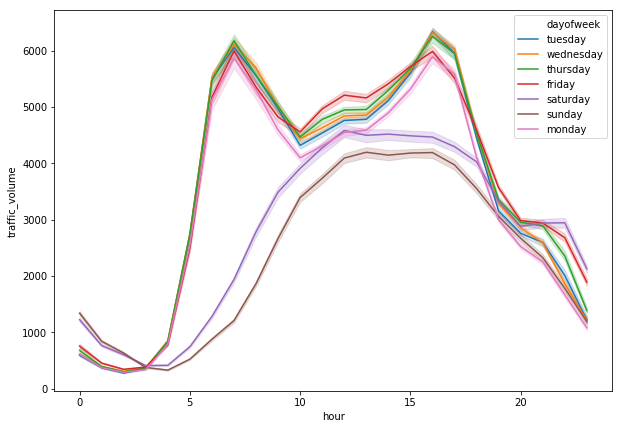

In [8]:
#taffic volume difference by the day of week.

plt.figure(figsize=(10,7))
sns.lineplot(x=train['hour'],y=train['traffic_volume'],hue=train['dayofweek'])

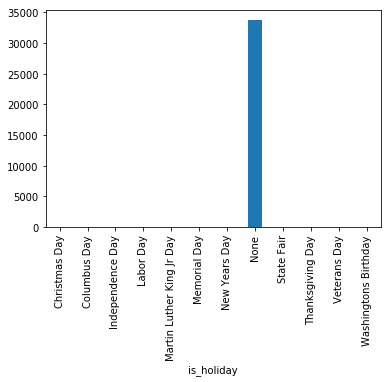

In [9]:
train.groupby('is_holiday').agg(len)['date_time'].plot.bar()

In [0]:
X=train.drop(['date_time','is_holiday','weather_description','year','month','day','traffic_volume','dew_point'],axis=1)
y=train['traffic_volume']
X=pd.get_dummies(X)

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3,random_state=1)

In [12]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error

linreg = LinearRegression()
linreg.fit(X_train,y_train)
print('Cross Validation Score: ',-1*cross_val_score(linreg,X_train,y_train,cv=5,scoring='neg_mean_absolute_error').mean())
from sklearn.metrics import r2_score, confusion_matrix
pred = linreg.predict(X_valid)
r2_score(pred,y_valid) 

Cross Validation Score:  1592.7685760968595


-3.328656170027079

In [13]:
ridreg = Ridge()
ridreg.fit(X_train,y_train)
print('Cross Validation Score: ',-1*cross_val_score(ridreg,X_train,y_train,cv=5,scoring='neg_mean_absolute_error').mean())
pred = ridreg.predict(X_valid)
r2_score(pred,y_valid) 

Cross Validation Score:  1592.7666545096772


-3.331317413186964

In [14]:
lasreg = Lasso()
lasreg.fit(X_train,y_train)
print('Cross Validation Score: ',-1*cross_val_score(lasreg,X_train,y_train,cv=5,scoring='neg_mean_absolute_error').mean())

Cross Validation Score:  1593.6054697001543


In [15]:
from xgboost import XGBRegressor
warnings.simplefilter("ignore",UserWarning)
xgb = XGBRegressor(objective='reg:squarederror')
xgb.fit(X_train,y_train)
print('Cross Validation Score: ',-1*cross_val_score(xgb,X_train,y_train,cv=5,scoring='neg_mean_absolute_error').mean())
pred = xgb.predict(X_valid)
r2_score(pred,y_valid) 

Cross Validation Score:  381.5028201841021


0.897155634215296

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
print('Cross Validation Score: ',-1*cross_val_score(rf,X_train,y_train,cv=5,scoring='neg_mean_absolute_error').mean())
pred = rf.predict(X_valid)
r2_score(pred,y_valid) 

Cross Validation Score:  303.0856


0.9271484902406111

import numpy as np

from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import GridSearchCV

n_estimators = np.arange(100, 800, 200)


max_features = ['auto', 'sqrt']

max_depth = np.arange(30, 100, 10)

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

}

rf = RandomForestRegressor()

rfg = GridSearchCV(estimator = rf, param_grid=random_grid, cv = 5,  n_jobs = -1)

rfg.fit(X_train,y_train)




hasil=[]

j=[]

for i in range(10,310,10):
    
    rf = RandomForestRegressor(n_estimators=i)
    
    rf.fit(X_train,y_train)
    
    pred = rf.predict(X_valid)
    
    hasil.append(mean_absolute_error(pred,y_valid))
    
    
   j.append(i)

score = pd.DataFrame({'Mean Absolute Error':hasil},index=j)

score.plot.line()

In [0]:
#rfg.best_estimator_

In [19]:
rf = RandomForestRegressor( max_depth=35,
                      max_features='auto', n_estimators=190,
                       random_state=None)
rf.fit(X_train,y_train)
pred = rf.predict(X_valid)
print('MAE: ',mean_absolute_error(pred,y_valid))

MAE:  287.0230857423225


In [20]:
rf = RandomForestRegressor( max_depth=35,
                      max_features='auto', n_estimators=290,
                       random_state=None)
rf.fit(X_train,y_train)
pred = rf.predict(X_valid)
print('MAE: ',mean_absolute_error(pred,y_valid))

MAE:  286.6111613343665


In [21]:
rf = RandomForestRegressor( max_depth=35,
                      max_features='auto', n_estimators=390,
                       random_state=None)
rf.fit(X_train,y_train)
pred = rf.predict(X_valid)
print('MAE: ',mean_absolute_error(pred,y_valid))

MAE:  286.37999364523847


In [22]:
rf = RandomForestRegressor( max_depth=35,
                      max_features='auto', n_estimators=170,
                       random_state=None)
rf.fit(X_train,y_train)
pred = rf.predict(X_valid)
print('MAE: ',mean_absolute_error(pred,y_valid))

MAE:  286.7525954103571


In [23]:
rf = RandomForestRegressor( max_depth=16,
                      max_features='auto', n_estimators=160,
                       random_state=None)
rf.fit(X_train,y_train)
pred = rf.predict(X_valid)
print('MAE: ',mean_absolute_error(pred,y_valid))

MAE:  288.00133003369234


In [24]:
rf = RandomForestRegressor( max_depth=36,
                      max_features='auto', n_estimators=187,
                       random_state=None)
rf.fit(X_train,y_train)
pred = rf.predict(X_valid)
print('MAE: ',mean_absolute_error(pred,y_valid))

MAE:  287.555846734935


In [25]:
rf = RandomForestRegressor( max_depth=20
,
                      max_features='auto', n_estimators=190,
                       random_state=None)
rf.fit(X_train,y_train)
pred = rf.predict(X_valid)
print('MAE: ',mean_absolute_error(pred,y_valid))

MAE:  287.11592998637326


In [26]:
from sklearn.metrics import r2_score
r2_score(pred,y_valid) 


0.9336472175245891

In [27]:
tabel = pd.DataFrame({'Importance':np.round(rf.feature_importances_,decimals=3)},index=X_train.columns).sort_values(by='Importance',ascending=False).head(10)
tabel

,Importance
hour,0.826
dayofweek_sunday,0.059
dayofweek_saturday,0.044
temperature,0.019
air_pollution_index,0.008
wind_direction,0.008
humidity,0.008
wind_speed,0.004
visibility_in_miles,0.004
rain_p_h,0.004
